In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, LSTM, Bidirectional
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.metrics import precision_score, recall_score, f1_score, cohen_kappa_score, classification_report
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('data\preprocessed.csv').dropna()

In [3]:
X = data["Reviews_cleaned"]
y = data["Category"]

In [4]:
maxlen = 10
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
word_index = tokenizer.word_index
print(f"Znaleziono {len(word_index)} unikatowych tokenów.")
data_X = pad_sequences(sequences, maxlen=maxlen)
print(f"Kształt tensora danych: {data.shape}") 
print(f"Kształt tensora etykiet: {y.shape}")

Znaleziono 10283 unikatowych tokenów.
Kształt tensora danych: (40524, 245)
Kształt tensora etykiet: (40524,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data_X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [7]:
X_train.shape, X_test.shape, X.shape

((32419, 10), (8105, 10), (40524,))

In [8]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
203/203 [==============================] - 11s 31ms/step - loss: 0.5048 - accuracy: 0.7622 - val_loss: 0.4637 - val_accuracy: 0.7910
Epoch 2/10
203/203 [==============================] - 5s 25ms/step - loss: 0.4304 - accuracy: 0.8126 - val_loss: 0.4612 - val_accuracy: 0.7872
Epoch 3/10
203/203 [==============================] - 5s 24ms/step - loss: 0.4133 - accuracy: 0.8234 - val_loss: 0.4866 - val_accuracy: 0.7932
Epoch 4/10
203/203 [==============================] - 5s 24ms/step - loss: 0.4028 - accuracy: 0.8294 - val_loss: 0.4612 - val_accuracy: 0.7901
Epoch 5/10
203/203 [==============================] - 5s 24ms/step - loss: 0.3953 - accuracy: 0.8362 - val_loss: 0.4545 - val_accuracy: 0.7913
Epoch 6/10
203/203 [==============================] - 5s 24ms/step - loss: 0.3897 - accuracy: 0.8381 - val_loss: 0.4628 - val_accuracy: 0.7910
Epoch 7/10
203/203 [==============================] - 5s 24ms/step - loss: 0.3836 - accuracy: 0.8406 - val_loss: 0.4568 - val_accuracy: 0.792

In [11]:
import matplotlib.pyplot as plt
def plot_history(history, key="loss"):
    metric = history.history[key]
    val_metric = history.history[f"val_{key}"]
    epochs = range(len(metric))
    plt.plot(epochs, metric, "bo", label=f"{key} - train")
    plt.plot(epochs, val_metric, "b", label=f"{key} - val")
    plt.title(f"training - {key}")
    plt.legend()
    plt.show()

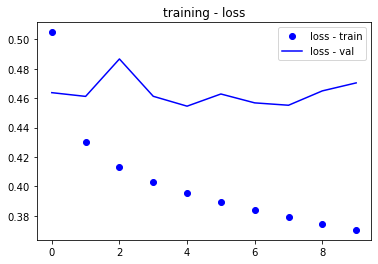

In [12]:
plot_history(history)

In [13]:
y_pred = np.round(model.predict(X_test))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.51      0.60      2485
         1.0       0.81      0.92      0.86      5620

    accuracy                           0.79      8105
   macro avg       0.77      0.71      0.73      8105
weighted avg       0.78      0.79      0.78      8105



In [14]:
cohen_kappa_score(y_test, y_pred)

0.4651727381320977

In [15]:
f1_score(y_test, y_pred)

0.8590738423028786